# Phase 1 : Exploration des données (EDA)

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [58]:
data.shape

(1338, 7)

In [59]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


<Axes: >

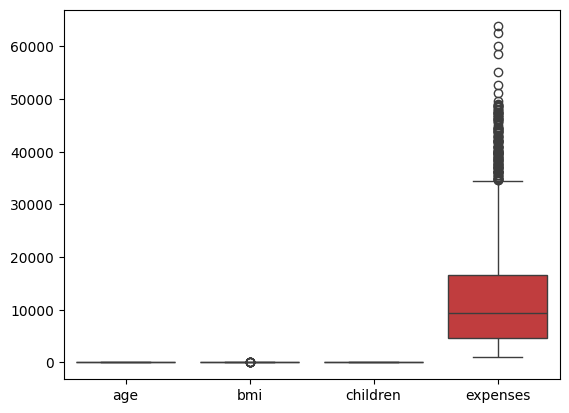

In [60]:
sns.boxplot(data)

On remarque une grande différence d'échelle entre les valeurs de la colonne 'expenses' et les valeurs des autres colonnes. Une **normalisation** va être nécessaire plus tard.

On aperçoit également l'existence de valeurs extrêmes dans la colonne 'expenses'. Il sera nécessaire de se poser la question de conserver ou non ces données.

<Axes: ylabel='expenses'>

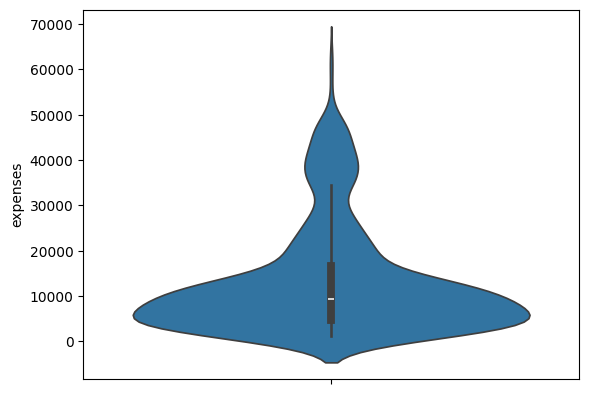

In [61]:
sns.violinplot(data['expenses'])

<Axes: ylabel='age'>

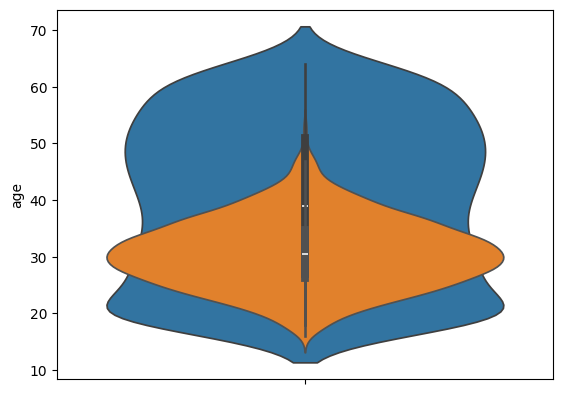

In [62]:
sns.violinplot(data['age'])
sns.violinplot(data['bmi'])

<Axes: ylabel='children'>

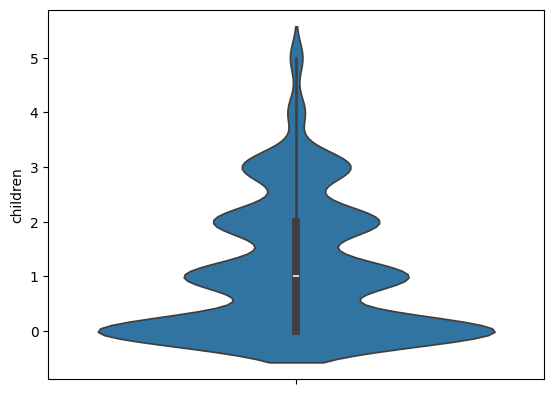

In [63]:
sns.violinplot(data['children'])

On remarque un défaut de

# Phase 2 : Prétraitement des données

## Etude des valeurs nulles

In [64]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


Le dataset ne contient pas de valeurs nulles.

In [65]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Etude des doublons

In [66]:
data.duplicated().sum()

1

Le dataset contient un doublon. On supprime donc ce doublon.

In [67]:
data.drop_duplicates(inplace=True)

In [68]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Etude des valeurs extrêmes et aberrantes parmi les données quantitatives

<Axes: >

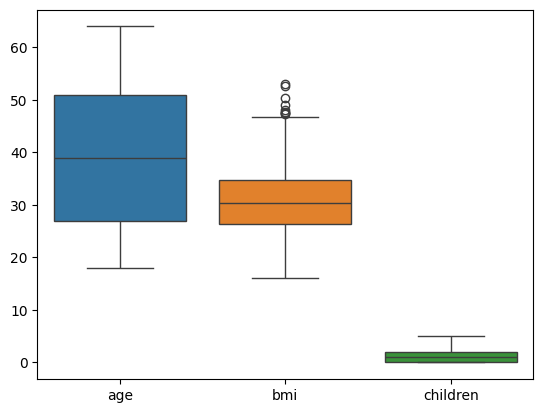

In [69]:
colonnes=['age','bmi','children']
sns.boxplot(data[colonnes])

D'après ce boxplot et le précédent, seules les colonnes 'bmi' et 'expenses' semblent avoir des valeurs extrêmes ou aberrantes. Mais **on ne modifie pas expenses, car c'est notre target**.

In [70]:
colonnes = data.select_dtypes(include=['number']).columns.tolist()
colonnes.remove('expenses')

for colonne in colonnes :
  q1_inc = data[colonne].quantile(0.25)
  q3_inc = data[colonne].quantile(0.75)
  iqr_inc = q3_inc - q1_inc
  borne_inf_inc = q1_inc - 1.5 * iqr_inc
  borne_sup_inc = q3_inc + 1.5 * iqr_inc
  data = data[(data[colonne] >= borne_inf_inc) & (data[colonne] <= borne_sup_inc)]

In [71]:
data.describe()

,age,bmi,children,expenses
count,1328.000000,1328.000000,1328.000000,1328.000000
mean,39.219127,30.539383,1.097139,13221.047952
std,14.042170,5.922394,1.208008,11997.547465
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.200000,0.000000,4744.322500
50%,39.000000,30.300000,1.000000,9369.615000
75%,51.000000,34.500000,2.000000,16604.305000
max,64.000000,46.800000,5.000000,62592.870000


In [72]:
data.shape

(1328, 7)

In [73]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Traitement des données qualitatives

On commence par répertorier le nombre de valeurs uniques pour les différentes colonnes.

In [74]:
data.nunique()

,0
age,47
sex,2
bmi,266
children,6
smoker,2
region,4
expenses,1328


In [75]:
#Affichage des valeurs exactes prises dans les 3 colonnes
print(data['smoker'].unique())
print(data['sex'].unique())
print(data['region'].unique())

['yes' 'no']
['female' 'male']
['southwest' 'southeast' 'northwest' 'northeast']


Les colonnes 'sex', 'smoker' et 'region' ne prennent que très peu de valeurs différentes.
'sex' et 'smoker' ne peuvent prendre que deux valeurs : on peut donc faire
* smoker : 1=oui, 0=non
* sex : 1=male, 0=female

Concernant les régions, on peut utiliser la technique des dummies, donc créer une colonne par valeur, contenant des true/false.
**Une des colonnes des régions peut être supprimée, car si toutes les autres colonnes des régions sont 'false', alors c'est f

In [76]:
from sklearn.preprocessing import LabelEncoder

#Remplacement des valeurs de la colonne 'sex' par 0 et 1 :
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])

#Remplacement des valeurs de la colonne 'smoker' par 0 et 1 :
data['smoker'] = le.fit_transform(data['smoker'])

#Création des nouvelles colonnes pour les données de la colonne 'region':
dummies = pd.get_dummies(data['region'])
data = pd.concat([data.drop('region', axis=1), dummies], axis=1)
data=data.drop(columns=['southwest']) # On supprime la dernière colonne qui est redondante
data.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast
0,19,0,27.9,0,1,16884.92,False,False,False
1,18,1,33.8,1,0,1725.55,False,False,True
2,28,1,33.0,3,0,4449.46,False,False,True
3,33,1,22.7,0,0,21984.47,False,True,False
4,32,1,28.9,0,0,3866.86,False,True,False


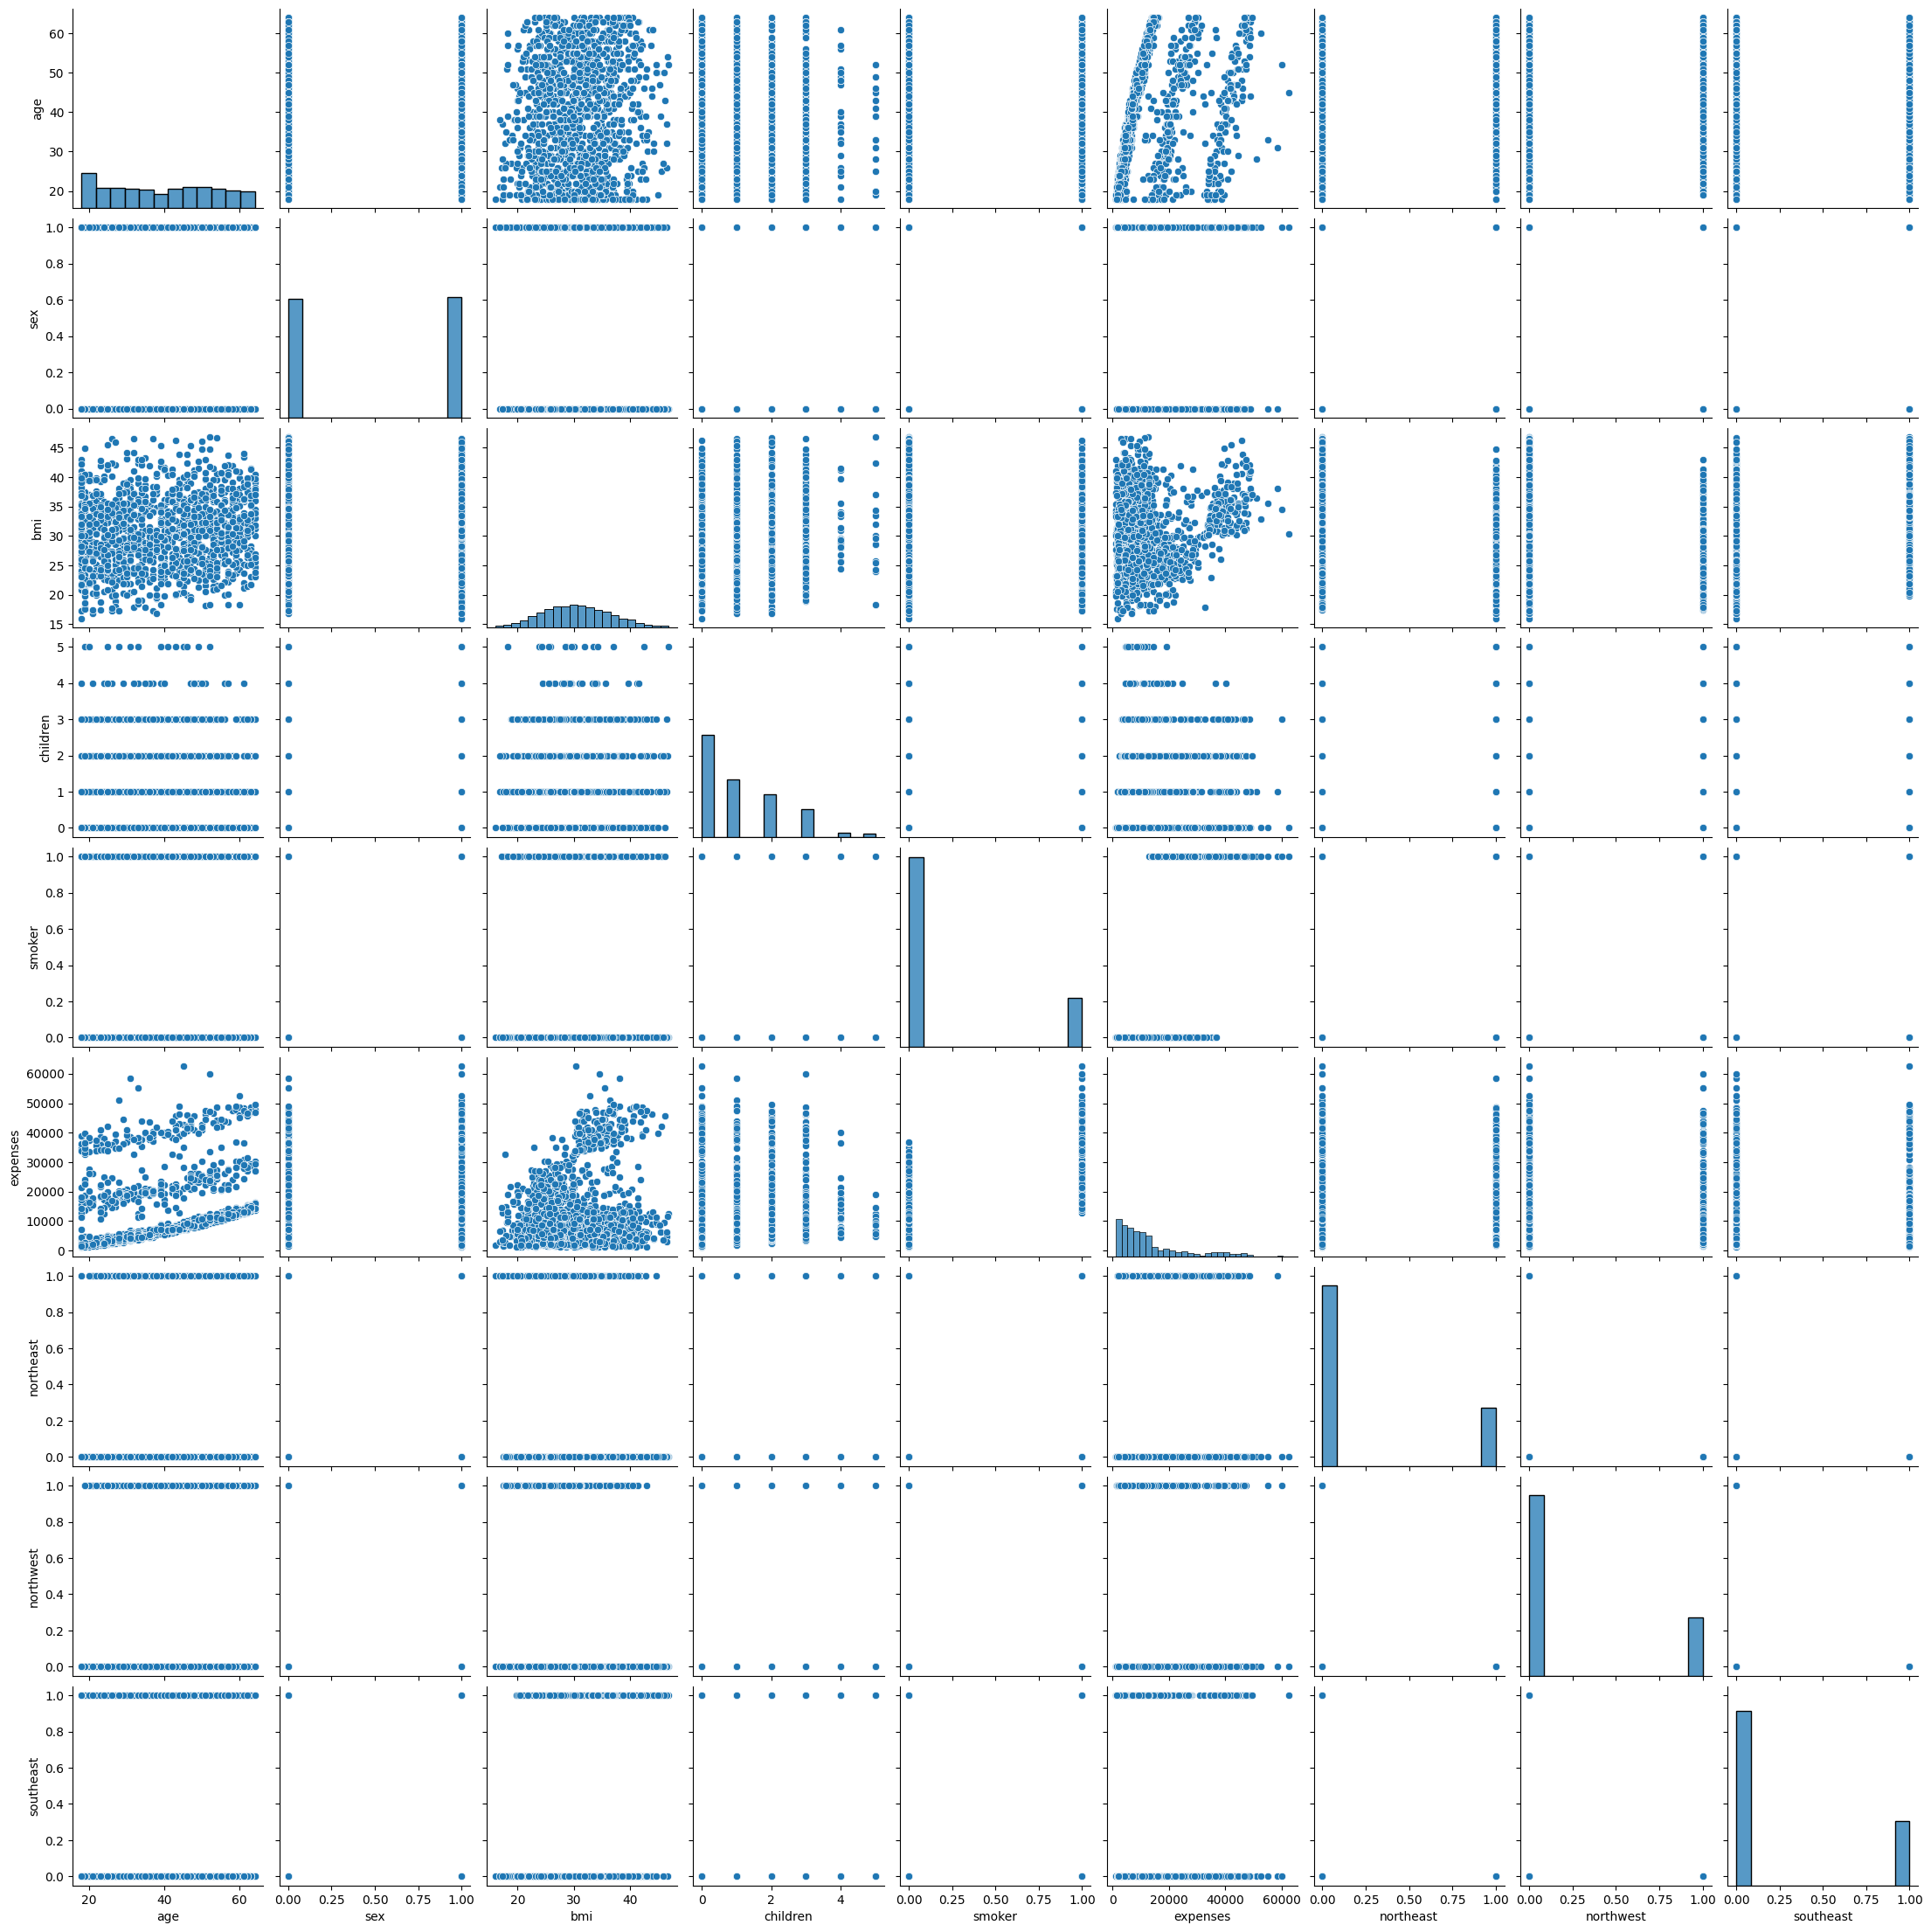

In [77]:
sns.pairplot(data)

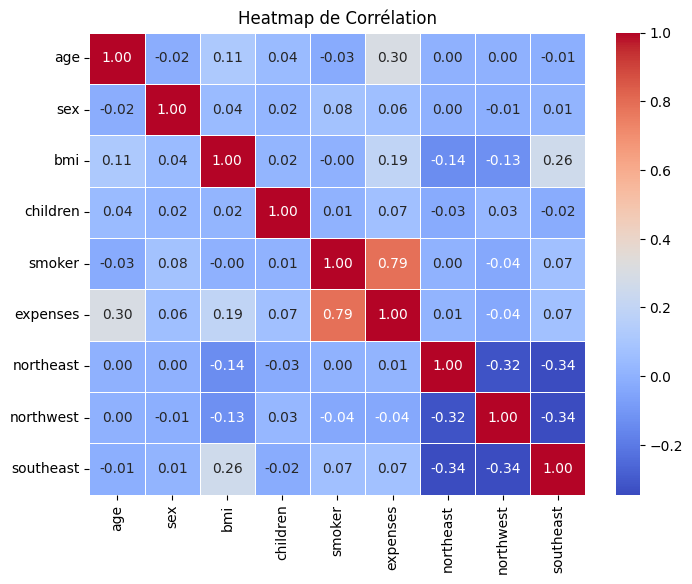

In [78]:
corr_matrix = data.corr()
# Créer la heatmap
plt.figure(figsize=(8, 6))  # Taille de la figure
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', cbar=True)

# Afficher la heatmap
plt.title('Heatmap de Corrélation')
plt.show()

In [79]:
#Calculer la matrice de corrélation de Spearman
spearman_corr = data.corr(method='spearman')

#Afficher la matrice de corrélation
print("Matrice de corrélation de Spearman")
print(spearman_corr)

Matrice de corrélation de Spearman
                age       sex       bmi  children    smoker  expenses  \
age        1.000000 -0.017961  0.109053  0.056985 -0.025349  0.534520   
sex       -0.017961  1.000000  0.041514  0.018135  0.080269  0.014479   
bmi        0.109053  0.041514  1.000000  0.016458 -0.001340  0.118776   
children   0.056985  0.018135  0.016458  1.000000  0.015915  0.132516   
smoker    -0.025349  0.080269 -0.001340  0.015915  1.000000  0.661966   
expenses   0.534520  0.014479  0.118776  0.132516  0.661966  1.000000   
northeast -0.001477  0.000997 -0.131335 -0.028114  0.004732  0.046587   
northwest  0.004708 -0.011291 -0.122304  0.035762 -0.035315 -0.018784   
southeast -0.015824  0.010721  0.240280 -0.016373  0.068055  0.017099   

           northeast  northwest  southeast  
age        -0.001477   0.004708  -0.015824  
sex         0.000997  -0.011291   0.010721  
bmi        -0.131335  -0.122304   0.240280  
children   -0.028114   0.035762  -0.016373  
smoker   

## Standardisation des données

In [80]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
expenses,0
northeast,0
northwest,0
southeast,0


In [81]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['age', 'bmi','children']
scaler = StandardScaler()

# Standardisation
data_scaled = scaler.fit_transform(data[features_to_scale])
data_scaled = pd.DataFrame(data_scaled, columns=features_to_scale)
clean_data=pd.concat([data.drop(features_to_scale, axis=1), data_scaled], axis=1)
clean_data.head()

,sex,smoker,expenses,northeast,northwest,southeast,age,bmi,children
0,0.0,1.0,16884.92,False,False,False,-1.440429,-0.445829,-0.908563
1,1.0,0.0,1725.55,False,False,True,-1.511669,0.550765,-0.080442
2,1.0,0.0,4449.46,False,False,True,-0.799261,0.415633,1.575799
3,1.0,0.0,21984.47,False,True,False,-0.443056,-1.324183,-0.908563
4,1.0,0.0,3866.86,False,True,False,-0.514297,-0.276915,-0.908563


In [82]:
clean_data.isna().sum()

,0
sex,10
smoker,10
expenses,10
northeast,10
northwest,10
southeast,10
age,10
bmi,10
children,10


In [83]:
clean_data.dropna(inplace=True)

In [84]:
clean_data.isna().sum()

,0
sex,0
smoker,0
expenses,0
northeast,0
northwest,0
southeast,0
age,0
bmi,0
children,0


In [85]:
clean_data.head()

,sex,smoker,expenses,northeast,northwest,southeast,age,bmi,children
0,0.0,1.0,16884.92,False,False,False,-1.440429,-0.445829,-0.908563
1,1.0,0.0,1725.55,False,False,True,-1.511669,0.550765,-0.080442
2,1.0,0.0,4449.46,False,False,True,-0.799261,0.415633,1.575799
3,1.0,0.0,21984.47,False,True,False,-0.443056,-1.324183,-0.908563
4,1.0,0.0,3866.86,False,True,False,-0.514297,-0.276915,-0.908563


## Phase 3 : Modélisation, entraînement et optimisation des modèles de régression

## Création des ensembles de test et de train

In [86]:
from sklearn.model_selection import train_test_split

X = clean_data.drop('expenses', axis=1)
y = clean_data['expenses']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Détermination des meilleurs paramètres pour le modèle

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

# Initialiser et entraîner un modèle Arbre de Décision
decision_tree = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=50, random_state=42)
decision_tree.fit(X_train, y_train)

# Prédictions et évaluation pour l'arbre de décision
y_pred_tree = decision_tree.predict(X_test)

# Use regression metrics instead of classification metrics
print("Arbre de Décision - MSE:", mean_squared_error(y_test, y_pred_tree))
print("Arbre de Décision - R²:", r2_score(y_test, y_pred_tree))

Arbre de Décision - MSE: 61329988.5248793
Arbre de Décision - R²: 0.6190191252519184


# Phase 4 : Evaluation des modèles

In [88]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [1, 3, 5, 7, 10, 20, None],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf': [4, 6, 8]
}

grid_search_dt = HalvingGridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)
grid_search_dt.fit(X_train, y_train)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 39
max_resources_: 1054
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 63
n_resources: 39
Fitting 5 folds for each of 63 candidates, totalling 315 fits
----------
iter: 1
n_candidates: 21
n_resources: 117
Fitting 5 folds for each of 21 candidates, totalling 105 fits
----------
iter: 2
n_candidates: 7
n_resources: 351
Fitting 5 folds for each of 7 candidates, totalling 35 fits
----------
iter: 3
n_candidates: 3
n_resources: 1053
Fitting 5 folds for each of 3 candidates, totalling 15 fits


HalvingGridSearchCV(estimator=DecisionTreeRegressor(max_depth=3,
                                                    min_samples_leaf=10,
                                                    min_samples_split=50,
                                                    random_state=42),
                    n_jobs=-1,
                    param_grid={'max_depth': [1, 3, 5, 7, 10, 20, None],
                                'min_samples_leaf': [4, 6, 8],
                                'min_samples_split': [3, 5, 7]},
                    verbose=3)

In [89]:
# Initialiser et entraîner un modèle Arbre de Décision
decision_tree = DecisionTreeRegressor(max_depth=1, min_samples_leaf=4, min_samples_split=7, random_state=42)
decision_tree.fit(X_train, y_train)

# Prédictions et évaluation pour l'arbre de décision
y_pred_tree = decision_tree.predict(X_test)

# Use regression metrics instead of classification metrics
print("Arbre de Décision - MSE:", mean_squared_error(y_test, y_pred_tree))
print("Arbre de Décision - R²:", r2_score(y_test, y_pred_tree))


Arbre de Décision - MSE: 52504153.65883275
Arbre de Décision - R²: 0.6738450655223049


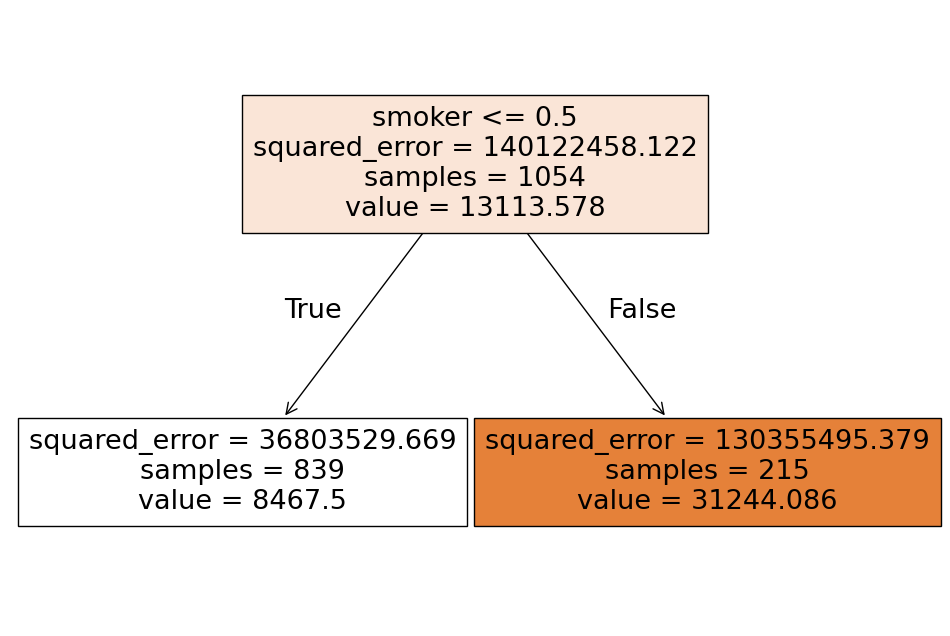

In [90]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree # Import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X_train.columns)
plt.show()

# Phase 5 : Interprétation des résultats et recommandations business

Concernant les résultats, on peut observer que le paramêtre le plus corrélé au montant de l'assurance est le fait de fumer ou pas. La corrélation est si forte que ce seul paramêtre permet d'avoir un arbre précis.

# Phase 6 : Exportation et utilisation du modèle final

In [93]:
import pickle

#Enregistrer le modèle dans un fichier
with open('model.pkl', 'wb') as file:
    pickle.dump(decision_tree, file)